# Analise exploratória

Imports e leitura dos dados

In [2]:
import math
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('../../DEF_NaoLigamosParaAG_FullData.csv', sep=",")

Explorando a forma dos dados

In [3]:
data.shape

(10000, 23)

In [4]:
data.head()

,loja,nro_pessoas,periodo_visita,sexo_negociante,idade_negociante,cor_cabelo_negociante,gesticula_negociante,vestimenta_negociante,valor_primeiro_carro,valor_segundo_carro,...,ano_carro_comprado,cor_primeiro_carro,cor_segundo_carro,cor_carro_comprado,tipo_primeiro_carro,tipo_segundo_carro,tipo_carro_comprado,tempo_atendimento,n_carros_vistos,entrou_nos_carros
0,2,1,Matutino,F,"[25, 40)",Ruivo,False,Mal-arrumado,83520,59400.0,...,NaN,Preto,Vermelho,NaN,SUV,Hatch,NaN,36.426679,3,True
1,1,5,Matutino,M,"[25, 40)",Preto,True,Normal,103320,45720.0,...,NaN,Branco,Branco,NaN,Hatch,Hatch,NaN,3.709804,1,True
2,2,1,Matutino,F,"[18, 25)",Ruivo,False,Bem-arrumado,59640,NaN,...,NaN,Preto,NaN,NaN,SUV,NaN,NaN,26.161509,2,True
3,2,2,Vespertino,M,"[18, 25)",Loiro,True,Normal,61680,88560.0,...,2007.0,Branco,Branco,Vermelho,SUV,Hatch,Sedan,41.336284,3,False
4,2,5,Matutino,M,"[40, 100)",Preto,True,Normal,92640,56400.0,...,NaN,Preto,Azul,NaN,SUV,SUV,NaN,10.713265,4,False


Devido à natureza dos dados, há alguns valores ausentes

Das 10000 instâncias, 3210 não tem as propriedades referentes ao segundo carro, indicando que 3210 pessoas olharam apenas um carro;

Além disso, 7531 instâncias não tem propriedades referentes ao carro comprado, indicando que 7531 pessoas não compraram nenhum carro.

In [5]:
data.isnull().sum()

loja                        0
nro_pessoas                 0
periodo_visita              0
sexo_negociante             0
idade_negociante            0
cor_cabelo_negociante       0
gesticula_negociante        0
vestimenta_negociante       0
valor_primeiro_carro        0
valor_segundo_carro      3210
valor_carro_comprado     7531
ano_primeiro_carro          0
ano_segundo_carro        3210
ano_carro_comprado       7531
cor_primeiro_carro          0
cor_segundo_carro        3210
cor_carro_comprado       7531
tipo_primeiro_carro         0
tipo_segundo_carro       3210
tipo_carro_comprado      7531
tempo_atendimento           0
n_carros_vistos             0
entrou_nos_carros           0
dtype: int64

Adicionaremos a propriedade _carro_foi_comprado_, booleano indicando se o carro foi comprado

In [6]:
data['carro_foi_comprado'] = data.apply(lambda x: not math.isnan(x['valor_carro_comprado']),axis=1)

In [7]:
# Ver colunas por tipo de dado
types = ['float64', 'int64', 'bool', 'object']

for t in types:
    print(t)
    cols = data.select_dtypes(include=[t]).columns
    for c in cols:
        print('\t', c)
    print('______________________________')

float64
	 valor_segundo_carro
	 valor_carro_comprado
	 ano_segundo_carro
	 ano_carro_comprado
	 tempo_atendimento
______________________________
int64
	 loja
	 nro_pessoas
	 valor_primeiro_carro
	 ano_primeiro_carro
	 n_carros_vistos
______________________________
bool
	 gesticula_negociante
	 entrou_nos_carros
	 carro_foi_comprado
______________________________
object
	 periodo_visita
	 sexo_negociante
	 idade_negociante
	 cor_cabelo_negociante
	 vestimenta_negociante
	 cor_primeiro_carro
	 cor_segundo_carro
	 cor_carro_comprado
	 tipo_primeiro_carro
	 tipo_segundo_carro
	 tipo_carro_comprado
______________________________


A partir de agora, seguiremos propondo diversas questões, e buscando respostas para elas nos dados. Vale notar que esse é um trabalho de **exploração**, então nem sempre as respostas trarão informações relevantes

Como os preços dos carros se distribuem? nas duas diferentes lojas? Existe diferença?

Para responder essa, faremos um gráfico da distribuição do atributo _valor_primeiro_carro_, uma vez que esse é o único que não está ausente.

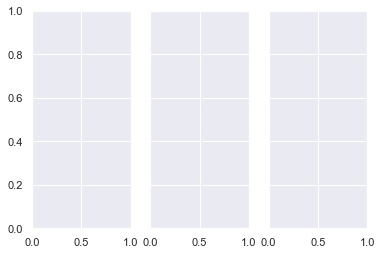

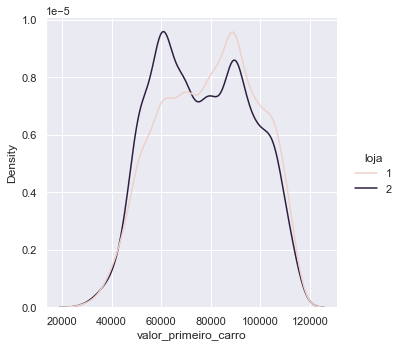

In [40]:
sns.set_theme(context='notebook', palette='colorblind')
fig, axes = plt.subplots(1,3, sharey=True)
sns.displot(data=data, x='valor_primeiro_carro', hue='loja', kind='kde', ax=axes[0])
# sns.displot(data=data[data['loja'] == 1], x='valor_primeiro_carro', ax=axs[1])
# sns.displot(data=data[data['loja'] == 2], x='valor_primeiro_carro', ax=axs[2])

Imports

In [3]:
import math
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Leitura dos dados

In [7]:
sns.set_theme()
data = pd.read_csv('../../DEF_NaoLigamosParaAG_FullData.csv', sep=",")